# **Descriptive Analyses of Expenses for a family in the Netherlands**
***

The project is analysing the expenses of the family by using two different bank account transactions. In order to perform this analyses, the transaction of the two bank account, which are used both by the family, have been used. Transactions are xls and csv format. In each file, data keeps differently so in order to merge all data, data cleanng and wrangling were needed. data was collected from ABN AMRO and ING bank web applications.

## Bussiness Understanding
***
The project is analysing the expenses of the family by using two different bank account transactions.

What is the descriptive anayses of expenses?

Why money can not be saved?

## Data Requirements
* Bank transactions records are needed. They can be downloaded from personal internet bank account.

## Import Libraries
***

In [1]:
######################### Below are the libraries that are used in order to perform EDA (Exploratory data analysis).
print("{:#^150}".format(" Importing Necessary Libraries "))
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt             #visualisation
mpl.style.use("ggplot")
from os import listdir
from os.path import isfile, join
#from tkinter.filedialog import askdirectory
import time
from tqdm.notebook import tqdm

print("imported!!")

########################################################### Importing Necessary Libraries ############################################################
imported!!


## Defining Functions and Methods
***
the functions are:
* Missing data of the variables
* Cleaning process of both ING Bank and ING Bank data in order to combine it successfully
* Day and Month variables are defined as Categorical variable

In [2]:
###################################Functions and Methods
print("{:#^150}".format(" Defining Functions and Methods "))
# Definitions-------------

def findMissingData(dataFrame):
    missing_data = dataFrame.isnull()
    
    for column in missing_data.columns.values.tolist(): 
        if str(missing_data[column].any()) == "True":
            print("-------",column,"-------")
            print("***There is MISSING data***")
            print(missing_data[column].value_counts())
        else:
            print("-------",column,"-------")
            print("There is NO missing data")
        
        
def cleaningProcess(dataFrame): #wrangling process
    print("--------> Process starts....")
# duplication remove
    print("--------> Removing duplicates")
    dataFrame.drop_duplicates(inplace=True)
# make lowercase of the column names
    print("--------> Make lowercase of the column names")
    dataFrame.columns = map(str.lower, dataFrame.columns) 
# remove whitespaces of the column names
    print("--------> Removing whitespaces of the column names")
    dataFrame.columns = dataFrame.columns.str.replace(' ', '')
# changing date format
    print("--------> Changing date column format")    
    dataFrame["date"] = pd.to_datetime(dataFrame["date"], format="%Y%m%d")
# creating separate day, month and year info
    print("--------> Creating separate day, month, year columns") 
    dataFrame["day"] = dataFrame["date"].dt.day_name()
    dataFrame["month"] = dataFrame["date"].dt.month_name()
    dataFrame["year"] = dataFrame["date"].dt.year
# sort the data according to date info    
    print("--------> Sorting data by Date column and reseting index values") 
    dataFrame.sort_values(["date"], ignore_index=True, inplace=True)
    dataFrame.reset_index(drop=True, inplace=True)
    print("--------> Process Finished")
    return dataFrame

def dayMonthCategoryChange(dataFrame):
    ''' Converting Day and Month columns datatype to Category and ordered with day and month order'''
    #Change Day and Month columns from Object to Categorical and ordered
    months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dataFrame["month"] = pd.Categorical(dataFrame["month"], categories = months_categories, ordered=True)
    days_categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    dataFrame["day"] = pd.Categorical(dataFrame["day"], categories = days_categories, ordered=True)
    
print("{:#^150}".format(" done! "))

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    print("Interquartile range is ", iqr)
    fence_low  = q1-1.5*iqr
    print("Lower fence is ",fence_low)
    fence_high = q3+1.5*iqr
    print("Higher fence is ", fence_high)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

########################################################### Defining Functions and Methods ###########################################################
####################################################################### done! ########################################################################


# Data Collection

## Reading Data and creating dataframes
***
* Reading Excel and CSV files separately and create two dataframe namely df_abnAmro and df_ingBank
* Both are created separately because each data has different variables

In [3]:
######################### Creating Dataframes for each ABN Amro and ING Bank from excel files
print("{:#^150}".format(" Reading Excel Files and Creating Dataframes for both ABN Amro and ING Bank "))

# define the path. this folder contains excel and CSV files that belong to ING and ABN Bank and these files are regulary downloaded from internet banking sites.
mypath = r"D:\00_BACKUP_BY_DRIVE\Bank_expense_analysis\DATA"
files = listdir(mypath)

# define List that keeps every file as dataframes
dataList_abn = []
dataList_ing = []

# define empty dataFrame for both 
abnAmro = pd.DataFrame()
ingBank = pd.DataFrame() 

# read every file in the folder and append into List. Luckily ABN data is in excel format and ING is in CSV format
for file in tqdm(files):
    
    if ".xls" in file:
        dataList_abn.append(pd.read_excel(mypath + "\\" + file))
        print(file, "-------> ABN AMRO")
        
    elif ".xlsx" in file:
        dataList_abn.append(pd.read_excel(mypath + "\\" + file))
        print(file, "-------> ABN AMRO")
        
    elif ".csv" in file:
        dataList_ing.append(pd.read_csv(mypath + "\\" + file, decimal = ",", sep = ";"))
        print(file, "-------> ING BANK")
        
    else:
        print(file, "--------------->This file is not valid")

# merge every record in every dataframe in the list to the one dataframe
abnAmro = pd.concat(dataList_abn) 
ingBank = pd.concat(dataList_ing)

# take copies of both dataframe in order to keep raw data
df_abnAmro = abnAmro.copy()
df_ingBank = ingBank.copy()

# deleting temporary used variables
del(dataList_abn, dataList_ing)
print("Dataframes, df_abnAmro and df_ingBank, have been created")
print("--------------------------------------------------------")

##################################### Reading Excel Files and Creating Dataframes for both ABN Amro and ING Bank #####################################


  0%|          | 0/25 [00:00<?, ?it/s]

ABNAMRO_20220101_20230101.xls -------> ABN AMRO
ABN_AMRO_DATA.xls -------> ABN AMRO
ABN_AMRO_DATAXLS230109103200.xls -------> ABN AMRO
ABN_AMRO_DATAXLS230125124527.xls -------> ABN AMRO
ABN_AMRO_XLS230205190654.xls -------> ABN AMRO
ABN_AMRO_XLS230209172238.xls -------> ABN AMRO
ABN_AMRO_XLS230224102548.xls -------> ABN AMRO
ABN_AMRO_XLS230321132159.xls -------> ABN AMRO
ABN_AMRO_XLS230324101153.xls -------> ABN AMRO
ABN_AMRO_XLS230414110432.xls -------> ABN AMRO
ABN_AMRO_XLS230526142356.xls -------> ABN AMRO
ABN_AMRO_XLS230613162335.xls -------> ABN AMRO
ABN_AMRO_XLS230613164027.xls -------> ABN AMRO
ABN_AMRO_XLS230731180939.xls -------> ABN AMRO
ABN_AMRO_XLS230831163420.xls -------> ABN AMRO
ING_NL79INGB0626712009_01-01-2021_08-01-2023.csv -------> ING BANK
ING_NL79INGB0626712009_01-01-2023_04-02-2023.csv -------> ING BANK
ING_NL79INGB0626712009_01-01-2023_13-04-2023.csv -------> ING BANK
ING_NL79INGB0626712009_01-02-2023_20-03-2023.csv -------> ING BANK
ING_NL79INGB0626712009_05-02-

# Data Preparation

## Cleaning the Data: ABN AMRO
***
1. Some columns names are renamed in order to be identical for both dataframe.
2. Transactions are defined as debit and credit in ING data. ABN data shows the debit as negatif amount and credit as positive amount. First all of the records were defined as debit and the records whose amount was greater than 0 were defined as credit.
3. All negatif values were converted into positive one so calculation and drawing graphs will be useful.
4. Cleaning function was applied.
5. 2 variables were added, namely "name" and "bankname"
6. Day and Month variable define as categorical variable.
7. Name column for ABN AMRO is created and filled  by using Description Field.

In [4]:
##################### Cleaning the data

## ABN AMRO
print("{:#^150}".format(" CLEANING ABN AMRO DATA "))
print("--------> ABN AMRO - removing unnecessary columns") 
df_abnAmro.drop(["accountNumber","mutationcode","valuedate"], inplace=True, axis = 1)

# 1. Some columns names are renamed in order to be identical for both dataframe
print("--------> ABN AMRO - renaming columns")         
df_abnAmro.rename(columns={"transactiondate":"date",
                           "startsaldo":"startbalance",
                           "endsaldo":"endbalance"}, inplace=True)    

# 2. Transactions are defined as debit and credit in ING data. ABN data shows the debit as negatif amount and credit as positive amount.
# first all of the records were defined as debit and the records whose amount was greater than 0 were defined as credit.
df_abnAmro["debit_credit"] = "Debit" 
df_abnAmro.loc[df_abnAmro["amount"] > 0,["debit_credit"]] = "Credit"

# 3. All negatif values were converted into positive one so calculation and drawing graphs will be useful
df_abnAmro["amount"] = df_abnAmro["amount"].apply(lambda x : x*-1 if x<0 else x*1)

# 4. Cleaning function was applied.
cleaningProcess(df_abnAmro)

#5. 2 variables were added, namely "name" and "bankname"
df_abnAmro["name"] = np.nan
df_abnAmro["bankname"] = "ABN AMRO"

#6. Day and Month variable define as categorical variable.
dayMonthCategoryChange(df_abnAmro)
print("--------> Cleaning ABN AMRO - completed")

# 7. Name column for ABN AMRO is created and filled  by using Description Field
# This name list was prepared manually and every name is searching in description variable and if found, it is written in "name" column 
nameList = ["Jumbo","Albert Heijn", "Lidl", "Nettorama", "Aldi","Sioux Expats", "KINDERBIJSLAG", "Ozturk Fresh Food","Izmir", "Izzet", "Can Slagerij", "TAMOIL", "Shell", "TINQ", "TotalEnergies", "Total",
            "Esso","Action", "Hema", "Praxis", "solow", "Gamma", "Ikea", "Hornbach", "PRIMARK", "FirstXL", "H&M", "Primera", "So-Low", "Wibra", "ETOS", "McDonald's", "the Post", "Oakwood", "la Toscana",
            "the Brand", "Arif","Kruidvat", "Holland & Barrett","Decathlon", "Youfone", "REVOLT21", "Chiroprac","B-Fysic Andromeda", "Coolblue","Sioux","brabant water","KPN","Notariskantoor",
           "FBTO" , "REAAL" , "ANAC" , "ASR" , "SCHADEVERZEKERING" , "SCHADEV", "bol.com b.v.", "ABN AMRO", "ennatuurlijk b.v.","Q Park", "W.H.W. Volleman - van Geertruy","C&A","Den Ekkerman",
           "CCV Slagerij Zeraan","Mad Science Brabant by Sisow", "e. tasel", "Amazon", "PATHE", "gemeente Eindhoven", "City Sport", "INTERTOYS","ov-chipkaart","sge", "Jamin", "SAMSUNG",
            "Monkey Town Group","Boshuys", "Corendon","Ziya", "Step by Step", "Enthousiasment", "Expert", "BLOKKER", "ZOOPLUS", "GR-043-D","GR043D","Park","Las Salinas","Kwik Fit","EKC Afbouwmaterialen","Q Park","SPEELGOEDWINKEL"]
for name in tqdm(nameList):
    df_abnAmro.loc[df_abnAmro["description"].str.contains(name, case=False), ["name"]] = name.upper()

############################################################### CLEANING ABN AMRO DATA ###############################################################
--------> ABN AMRO - removing unnecessary columns
--------> ABN AMRO - renaming columns
--------> Process starts....
--------> Removing duplicates
--------> Make lowercase of the column names
--------> Removing whitespaces of the column names
--------> Changing date column format
--------> Creating separate day, month, year columns
--------> Sorting data by Date column and reseting index values
--------> Process Finished
--------> Cleaning ABN AMRO - completed


  0%|          | 0/91 [00:00<?, ?it/s]

## Cleaning the Data: ING BANK
***
1. Some columns names are renamed in order to be identical for both dataframe
2. Cleaning function was applied.
3. start balance was calculated
4. variable was added, namely bankname"
5. Day and Month variable defined as categorical variable.

In [5]:
############################# ING BANK
print("{:#^150}".format(" CLEANING ING BANK DATA "))
print("--------> ING BANK - removing unnecessary columns")
df_ingBank.drop(["Tag","Account","Counterparty","Code", "Transaction type"], inplace=True, axis = 1)    
print("--------> ING BANK - renaming columns")

# 1. Some columns names are renamed in order to be identical for both dataframe
df_ingBank.rename(columns={"Amount (EUR)":"amount",
                           "Resulting balance":"endbalance",
                           "Name / Description":"name",
                           "Debit/credit": "debit_credit",
                           "Notifications":"description"}, inplace=True)


# 2. Cleaning function was applied.
cleaningProcess(df_ingBank)

# 3. start balance was calculated
df_ingBank.loc[df_ingBank["debit_credit"] == "Debit","startbalance"] = (df_ingBank["endbalance"] + df_ingBank["amount"])
df_ingBank.loc[df_ingBank["debit_credit"] == "Credit","startbalance"] = (df_ingBank["endbalance"] - df_ingBank["amount"])

# 4. variable was added, namely bankname"
df_ingBank["bankname"] = "ING BANK"

# 5. Day and Month variable defined as categorical variable.
dayMonthCategoryChange(df_ingBank)
print("--------> Cleaning ING BANK - completed")

############################################################### CLEANING ING BANK DATA ###############################################################
--------> ING BANK - removing unnecessary columns
--------> ING BANK - renaming columns
--------> Process starts....
--------> Removing duplicates
--------> Make lowercase of the column names
--------> Removing whitespaces of the column names
--------> Changing date column format
--------> Creating separate day, month, year columns
--------> Sorting data by Date column and reseting index values
--------> Process Finished
--------> Cleaning ING BANK - completed


## Merging both dataframes into df
***
1. amounts that transfers from ABN (Debit) to ING (Credit) have been deleted because these values are duplicate. the income values should be unique. 
2. the IBAN values are shown as XXXX because of the sensitive information

In [6]:
print("{:#^150}".format(" MERGING ABN AMRO and ING BANK DATA "))

# amounts that transfers from ABN (Debit) to ING (Credit) have been deleted because these values are duplicate. the income values should be unique. 
# the IBAN values are shown as XXXX because of the sensitive information
df1 = df_abnAmro.drop(index = df_abnAmro.loc[(df_abnAmro["debit_credit"] == "Debit") & (df_abnAmro["description"].str.contains("NL79INGB0626712009"))].index)
df2 = df_ingBank.drop(index = df_ingBank.loc[(df_ingBank["debit_credit"] == "Credit") & (df_ingBank["description"].str.contains("NL20ABNA0887098665"))].index)

# Variable order of the dataframe was defined
varOrder=["date","day","month","year","name","startbalance","endbalance","debit_credit","amount","description","bankname"]

# Concated both dataframes that both don't have corresponding transactions between ING and ABN AMRO.
# while concated, column order is redefined.
df = pd.concat([df1[varOrder],df2[varOrder]], ignore_index=True)

# records are sorted according to date column and index values are reset.
print("--------> Sorting data by Date column and reseting index values") 
df.sort_values(["date"], ignore_index=True, inplace=True)
df.reset_index(drop=True, inplace=True)
print("--------> DataFrame df has been created")

# deleting temporary used variables
del (df1,df2)

######################################################### MERGING ABN AMRO and ING BANK DATA #########################################################
--------> Sorting data by Date column and reseting index values
--------> DataFrame df has been created


## Labeling the expenses
***
1. In order to analyse the spending habits according to the type of expenses, every records was labeled. These labels were defined manually. 
2. To label the records, some key words were searching in "description" and "name" columns. if it was found, it was labeled according to the definition.

In [7]:
# LABELING
print("{:#^150}".format(" LABELING STARTED "))

for i in ["description","name"]:
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Land:", case= False)),["label"]] = "Abroad"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Ozturk|Izmir|Izzet|Can Slagerij|CCV Slagerij Zeraan", case= False)),["label"]] = "Turk market"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("TAMOIL|Shell|TINQ|TotalEnergies|Total|Esso|ELAN", case= False)),["label"]] = "Fuel"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Jumbo|Albert Heijn|Lidl|Nettorama|Aldi|KEURSLAGERIJ|Supermarkt|KAUFLAND|Slijterij vd Heyden|Bazar|Holland Kaascentru|KAASHUIS", case= False)),["label"]] = "Grocery"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Action|hema|Praxis|solow|Gamma|Ikea|Hornbach|PRIMARK|FirstXL|H&M|H & M|Primera|So-Low|Wibra|ETOS|C&A|CASA|Nike|BLOKKER|Scapino|Mammut|Hilfiger|Xenos|Expert Veldhoven",
                                                               case= False)),["label"]] = "Store"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("McDonald's|Mc Donalds|the Post|Oakwood|la Toscana|the Brand|Arif|Las Salinas|Happy Italy|Buffel|Amigos BBQ|Ziyas Taste|Paviljoen Genneper|Cafetaria|Five Guys|DUTCHHOMEMADE|Jamin|\
    RESTAURANT|Stadspaviljoen|Welschap|Burgers|Sushipoint|Boshuys|Ziya|Snackbar|GRAND CAFE",case= False)),["label"]] = "Restaurant"
    
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Kruidvat", case= False)),["label"]] = "Kruidvat"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Holland & Barrett", case= False)),["label"]] = "Holland & Barrett"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Decathlon", case= False)),["label"]] = "Decathlon"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("iDEAL|bol.com", case= False)),["label"]] = "Online Shopping"

    
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Youfone", case= False)),["label"]] = "Youfone"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("TOYS|Bruna|SPEELGOEDWINKEL", case= False)),["label"]] = "Books&Toys"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("NL93INGB0000724779|NL07RABO0123168686|Doga|Step by Step", case= False)),["label"]] = "Courses"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Sioux", case= False)),["label"]] = "Sioux"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("ENNATUURLIJK|ENECO|KPN|brabant water|T-MOBILE", case= False)),["label"]] = "House Fixed Exp."
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("EKC Afbouwmaterialen|WoonEnzo|c. colleij", case= False)),["label"]] = "Furniture"
    
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Notariskantoor", case= False)),["label"]] = "Notary"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("REVOLT21", case= False)),["label"]] = "REVOLUT"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Chiroprac|B-FYSIC|Maxima|NL60INGB0663263891|Apotheek", case= False)),["label"]] = "Health"
   
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("NL32ABNA0455685711", case= False)),["label"]] = "House Rent"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("GR-043-D|gr043d|oostendorp|Kwik Fit|BELASTINGDIENST", case= False)),["label"]] = "Car"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Parking|Q Park|Parkmobile", case= False)),["label"]] = "Car Park"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Sport|Den Ekkerman|Laco|DéDé B.V.|City Spo", case= False)),["label"]] = "Sport"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("FBTO|REAAL|ANAC|ASR|SCHADEVERZEKERING|SCHADEV|Zilveren Kruis", case= False)),["label"]] = "Insurance"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("ING Hypotheken", case= False)),["label"]] = "Mortgage"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Kosten", case= False)),["label"]] = "ING Bank"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Basic Package", case= False)),["label"]] = "ABNAMRO Bank"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("OV-Chipkaart|NSAutomaat", case= False)),["label"]] = "Transportation"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Corendon|Airport", case= False)),["label"]] = "Airplane"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Geldmaat",case= False)),["label"]] = "Money Withdraw"  
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Tikkie|UCAK|ERKAN|Isiksal|Filoglu",case= False)),["label"]] = "Money Transfer" 
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Cinema|Pathe|Efteling|Toverland|Laco|Klimcentrum",case= False)),["label"]] = "Cinema & Fun"
    df.loc[(df["debit_credit"]=="Debit") & (df[i].str.contains("Camping",case= False)),["label"]] = "Holiday" 

df.loc[(df["debit_credit"]=="Credit"),["label"]] = "Payback"
df.loc[(df["debit_credit"]=="Credit") & (df["description"].str.contains("Sioux Expats", case= False)),["label"]] = "Income"
df.loc[(df["debit_credit"]=="Credit") & (df["description"].str.contains("KINDERBIJSLAG", case = False)),["label"]] = "Kinderbijslag"
findMissingData(df)
df.loc[df["label"].isna(),["label"]] = "Other Expenses"
df.loc[df["name"].isna(),["name"]] = "Other"

print(df["label"].unique())
findMissingData(df)
print("{:#^150}".format(" LABELING FINISHED "))

################################################################## LABELING STARTED ##################################################################
------- date -------
There is NO missing data
------- day -------
There is NO missing data
------- month -------
There is NO missing data
------- year -------
There is NO missing data
------- name -------
***There is MISSING data***
False    1775
True      434
Name: name, dtype: int64
------- startbalance -------
There is NO missing data
------- endbalance -------
There is NO missing data
------- debit_credit -------
There is NO missing data
------- amount -------
There is NO missing data
------- description -------
There is NO missing data
------- bankname -------
There is NO missing data
------- label -------
***There is MISSING data***
False    1997
True      212
Name: label, dtype: int64
['Store' 'Grocery' 'Restaurant' 'Furniture' 'Abroad' 'Insurance' 'Health'
 'Online Shopping' 'Other Expenses' 'Youfone' 'Sioux' 'Income' 'Fuel'
 'Tr

# Export final data to CSV

In [8]:
df.to_csv(r"D:\00_BACKUP_BY_DRIVE\Bank_expense_analysis\expenses.csv",index=True)

## Finding number of months in each year
***

In [9]:
# find number of months in each year
months = dict(df.groupby("year")["month"].unique())
print(months)
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])
print(numberofMonths)
numberofmonths_df = pd.DataFrame({"year":numberofMonths.keys(),"numberofmonths":numberofMonths.values()}).set_index("year")
numberofmonths_df

{2021: ['July', 'August', 'September', 'October', 'November', 'December']
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December'], 2022: ['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December'], 2023: ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']}
{2021: 6, 2022: 12, 2023: 8}


,numberofmonths
year,
2021,6
2022,12
2023,8


## Descriptive Analysis
***

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2209 non-null   datetime64[ns]
 1   day           2209 non-null   category      
 2   month         2209 non-null   category      
 3   year          2209 non-null   int64         
 4   name          2209 non-null   object        
 5   startbalance  2209 non-null   float64       
 6   endbalance    2209 non-null   float64       
 7   debit_credit  2209 non-null   object        
 8   amount        2209 non-null   float64       
 9   description   2209 non-null   object        
 10  bankname      2209 non-null   object        
 11  label         2209 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 177.8+ KB


In [11]:
df.shape

(2209, 12)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2209.0,2022.106836,0.712462,2021.00,2022.00,2022.00,2023.00,2023.00
startbalance,2209.0,6625.704640,8243.813899,17.73,2791.17,4784.02,6583.77,41860.21
endbalance,2209.0,6615.868728,8245.178905,8.77,2518.54,4784.02,6628.67,41860.21
amount,2209.0,148.537669,804.652742,0.01,9.25,26.00,60.44,24704.72


In [13]:
df.nunique()

date             648
day                7
month             12
year               3
name             298
startbalance    2187
endbalance      2188
debit_credit       2
amount          1231
description     2143
bankname           2
label             37
dtype: int64

In [14]:
findMissingData(df)

------- date -------
There is NO missing data
------- day -------
There is NO missing data
------- month -------
There is NO missing data
------- year -------
There is NO missing data
------- name -------
There is NO missing data
------- startbalance -------
There is NO missing data
------- endbalance -------
There is NO missing data
------- debit_credit -------
There is NO missing data
------- amount -------
There is NO missing data
------- description -------
There is NO missing data
------- bankname -------
There is NO missing data
------- label -------
There is NO missing data


## Create Dataframe for Debit

In [15]:
df_debit= df.loc[df["debit_credit"]=="Debit"]
df_debit

,date,day,month,year,name,startbalance,endbalance,debit_credit,amount,description,bankname,label
0,2021-07-09,Friday,July,2021,ACTION,34838.52,34817.84,Debit,20.68,"BEA NR:72327610 09.07.21/13.26 Action 1235,P...",ABN AMRO,Store
1,2021-07-09,Friday,July,2021,JUMBO,34839.01,34838.52,Debit,0.49,BEA NR:N179K7 09.07.21/12.55 Jumbo Eindh B...,ABN AMRO,Grocery
2,2021-07-09,Friday,July,2021,JUMBO,34796.68,34786.84,Debit,9.84,"BEA NR:4QKP08 09.07.21/20.32 Jumbo 229276,...",ABN AMRO,Grocery
3,2021-07-09,Friday,July,2021,JUMBO,34817.84,34804.97,Debit,12.87,BEA NR:N179K7 09.07.21/13.52 Jumbo Eindh B...,ABN AMRO,Grocery
4,2021-07-09,Friday,July,2021,LA TOSCANA,34804.97,34799.37,Debit,5.60,BEA NR:90168064 09.07.21/16.41 LA TOSCANA IJ...,ABN AMRO,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2023-08-28,Monday,August,2023,Het Strandhuys Bergen NLD,4035.30,3929.35,Debit,105.95,Card sequence no.: 001 27/08/2023 17:34 Transa...,ING BANK,Store
2205,2023-08-29,Tuesday,August,2023,NETTORAMA 4 EINDHOVEN NLD,3885.81,3863.70,Debit,22.11,Card sequence no.: 001 28/08/2023 20:39 Transa...,ING BANK,Grocery
2206,2023-08-29,Tuesday,August,2023,Sioux Eindhoven EINDHOVEN NLD,3863.70,3861.70,Debit,2.00,Card sequence no.: 002 28/08/2023 11:52 Transa...,ING BANK,Sioux
2207,2023-08-30,Wednesday,August,2023,Meat UPP EINDHOVEN NLD,3861.70,3842.02,Debit,19.68,Card sequence no.: 001 29/08/2023 15:33 Transa...,ING BANK,Store


In [16]:
df_debit.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2100.0,2022.105238,0.715893,2021.00,2022.0000,2022.000,2023.0000,2023.00
startbalance,2100.0,6688.739790,8310.719076,17.73,2787.2900,4803.130,6640.3100,41860.21
endbalance,2100.0,6605.442829,8287.388992,8.77,2461.4275,4775.915,6573.9575,41856.01
amount,2100.0,83.296962,575.949391,0.01,8.9900,25.000,59.9250,24704.72


## Visualization
***

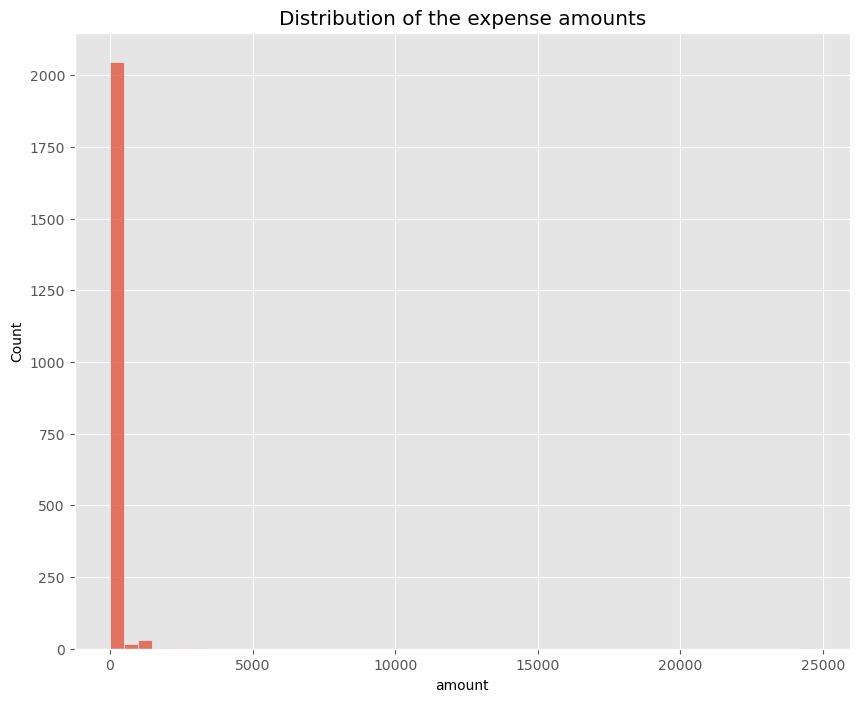

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(df_debit["amount"], bins=50)
plt.title("Distribution of the expense amounts")
plt.show()

<Axes: ylabel='amount'>

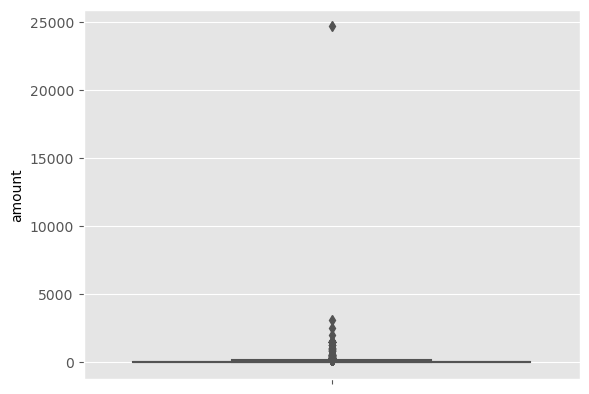

In [18]:
sns.boxplot(data=df_debit, y="amount")

In [19]:
df_debit.sort_values(by=["amount"],ascending=False).head(5)

,date,day,month,year,name,startbalance,endbalance,debit_credit,amount,description,bankname,label
124,2021-09-17,Friday,September,2021,NOTARISKANTOOR,38463.69,13758.97,Debit,24704.72,SEPA Overboeking IBAN: NL37RAB...,ABN AMRO,Notary
309,2021-11-13,Saturday,November,2021,Other,8359.75,5265.75,Debit,3094.00,SEPA Overboeking IBAN: NL94ABN...,ABN AMRO,Money Transfer
1164,2022-09-01,Thursday,September,2022,REVOLT21,8113.34,5613.34,Debit,2500.00,SEPA Overboeking IBAN: LT02325...,ABN AMRO,REVOLUT
877,2022-05-26,Thursday,May,2022,REVOLT21,8172.31,6172.31,Debit,2000.00,SEPA Overboeking IBAN: LT02325...,ABN AMRO,REVOLUT
287,2021-11-04,Thursday,November,2021,ING Hypotheken,1745.32,141.70,Debit,1603.62,Name: ING Hypotheken Description: NOTA INZAKE ...,ING BANK,Mortgage


#### The Notary expenses is not a common payment and it is assumed as extraordinary expense. Therefore it has been removed.

In [20]:
df_debit.loc[df_debit["amount"]==df_debit["amount"].max()].index[0]

124

In [21]:
df_debit.drop([df_debit.loc[df_debit["amount"]==df_debit["amount"].max()].index[0],],axis=0,inplace=True)

C:\Users\Erdinc\AppData\Local\Temp\ipykernel_22952\233275231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debit.drop([df_debit.loc[df_debit["amount"]==df_debit["amount"].max()].index[0],],axis=0,inplace=True)


In [22]:
df_debit.sort_values(by=["amount"],ascending=False).head(5)

,date,day,month,year,name,startbalance,endbalance,debit_credit,amount,description,bankname,label
309,2021-11-13,Saturday,November,2021,Other,8359.75,5265.75,Debit,3094.00,SEPA Overboeking IBAN: NL94ABN...,ABN AMRO,Money Transfer
1164,2022-09-01,Thursday,September,2022,REVOLT21,8113.34,5613.34,Debit,2500.00,SEPA Overboeking IBAN: LT02325...,ABN AMRO,REVOLUT
877,2022-05-26,Thursday,May,2022,REVOLT21,8172.31,6172.31,Debit,2000.00,SEPA Overboeking IBAN: LT02325...,ABN AMRO,REVOLUT
287,2021-11-04,Thursday,November,2021,ING Hypotheken,1745.32,141.70,Debit,1603.62,Name: ING Hypotheken Description: NOTA INZAKE ...,ING BANK,Mortgage
150,2021-09-24,Friday,September,2021,Other,13003.91,11503.91,Debit,1500.00,SEPA Overboeking IBAN: NL55RAB...,ABN AMRO,Furniture


In [23]:
df_debit.shape

(2099, 12)

<Axes: xlabel='amount'>

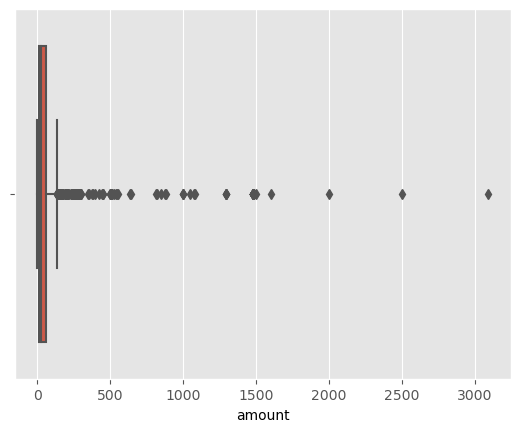

In [24]:
sns.boxplot(data=df_debit, x="amount", orient="h")

## Removing Outliers in Expenses

In [25]:
df_debit_clean=remove_outlier(df_debit,"amount")

Interquartile range is  50.895
Lower fence is  -67.3525
Higher fence is  136.22750000000002


In [26]:
df_debit_clean

,date,day,month,year,name,startbalance,endbalance,debit_credit,amount,description,bankname,label
0,2021-07-09,Friday,July,2021,ACTION,34838.52,34817.84,Debit,20.68,"BEA NR:72327610 09.07.21/13.26 Action 1235,P...",ABN AMRO,Store
1,2021-07-09,Friday,July,2021,JUMBO,34839.01,34838.52,Debit,0.49,BEA NR:N179K7 09.07.21/12.55 Jumbo Eindh B...,ABN AMRO,Grocery
2,2021-07-09,Friday,July,2021,JUMBO,34796.68,34786.84,Debit,9.84,"BEA NR:4QKP08 09.07.21/20.32 Jumbo 229276,...",ABN AMRO,Grocery
3,2021-07-09,Friday,July,2021,JUMBO,34817.84,34804.97,Debit,12.87,BEA NR:N179K7 09.07.21/13.52 Jumbo Eindh B...,ABN AMRO,Grocery
4,2021-07-09,Friday,July,2021,LA TOSCANA,34804.97,34799.37,Debit,5.60,BEA NR:90168064 09.07.21/16.41 LA TOSCANA IJ...,ABN AMRO,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2023-08-28,Monday,August,2023,Het Strandhuys Bergen NLD,4035.30,3929.35,Debit,105.95,Card sequence no.: 001 27/08/2023 17:34 Transa...,ING BANK,Store
2205,2023-08-29,Tuesday,August,2023,NETTORAMA 4 EINDHOVEN NLD,3885.81,3863.70,Debit,22.11,Card sequence no.: 001 28/08/2023 20:39 Transa...,ING BANK,Grocery
2206,2023-08-29,Tuesday,August,2023,Sioux Eindhoven EINDHOVEN NLD,3863.70,3861.70,Debit,2.00,Card sequence no.: 002 28/08/2023 11:52 Transa...,ING BANK,Sioux
2207,2023-08-30,Wednesday,August,2023,Meat UPP EINDHOVEN NLD,3861.70,3842.02,Debit,19.68,Card sequence no.: 001 29/08/2023 15:33 Transa...,ING BANK,Store


In [27]:
df_debit_outliers= pd.concat([df_debit,df_debit_clean]).drop_duplicates(keep=False)

In [28]:
df_debit_outliers

,date,day,month,year,name,startbalance,endbalance,debit_credit,amount,description,bankname,label
6,2021-07-10,Saturday,July,2021,Other,34786.84,34431.84,Debit,355.00,"BEA NR:EP001867 10.07.21/15.50 WoonEnzo BV,P...",ABN AMRO,Furniture
44,2021-07-27,Tuesday,July,2021,FBTO,38650.11,38449.11,Debit,201.00,SEPA Incasso algemeen doorlopend Incassant: NL...,ABN AMRO,Insurance
45,2021-08-02,Monday,August,2021,E. TASEL,38333.51,37038.51,Debit,1295.00,SEPA Overboeking IBAN: NL32ABN...,ABN AMRO,House Rent
64,2021-08-27,Friday,August,2021,FBTO,41635.64,41434.64,Debit,201.00,SEPA Incasso algemeen doorlopend Incassant: NL...,ABN AMRO,Insurance
75,2021-09-01,Wednesday,September,2021,E. TASEL,41027.35,39732.35,Debit,1295.00,SEPA Overboeking IBAN: NL32ABN...,ABN AMRO,House Rent
...,...,...,...,...,...,...,...,...,...,...,...,...
2137,2023-07-27,Thursday,July,2023,PARK,9238.19,9018.20,Debit,219.99,/TRTP/iDEAL/IBAN/NL51DEUT0265262461/BIC/DEUTNL...,ABN AMRO,Car Park
2154,2023-08-01,Tuesday,August,2023,Zilveren Kruis Zorgverzekeringen NV,2391.08,2104.73,Debit,286.35,Name: Zilveren Kruis Zorgverzekeringen NV Des...,ING BANK,Insurance
2160,2023-08-01,Tuesday,August,2023,ING Hypotheken,3870.97,2391.08,Debit,1479.89,Name: ING Hypotheken Description: NOTA INZAKE ...,ING BANK,Mortgage
2168,2023-08-18,Friday,August,2023,Pension De Kattenboom LIESSEL,1860.35,1664.85,Debit,195.50,Card sequence no.: 001 18/08/2023 09:08 Transa...,ING BANK,Store


In [29]:
df_debit_clean.shape

(1940, 12)

In [30]:
df_debit_outliers.shape

(159, 12)

In [31]:
df_debit.shape

(2099, 12)

In [32]:
df.shape

(2209, 12)

In [33]:
df_debit_clean[["amount"]].describe().T

,count,mean,std,min,25%,50%,75%,max
amount,1940.0,32.336175,30.12816,0.01,8.0,21.88,51.71,135.49


#### The funtion removed the expenses that are higher than 135.49 euros. They are called outliers.

# Expenses Which Have No Outliers 
### Inference
* Most of the outlier expenses was happened in 2021 because in this year, the family moved to this country and they had to buy expensive goods, such as furniture, house expenses, etc.
* Most of the outlier expenses was happened in Fridays, Saturdays and Sundays because the expensive shoppings are made mostly on these days
* Month variable does not give any meaningful insights
* Expenses are right skewed, positively skewed.
* Most of the expenses are between 10 and 60 euros

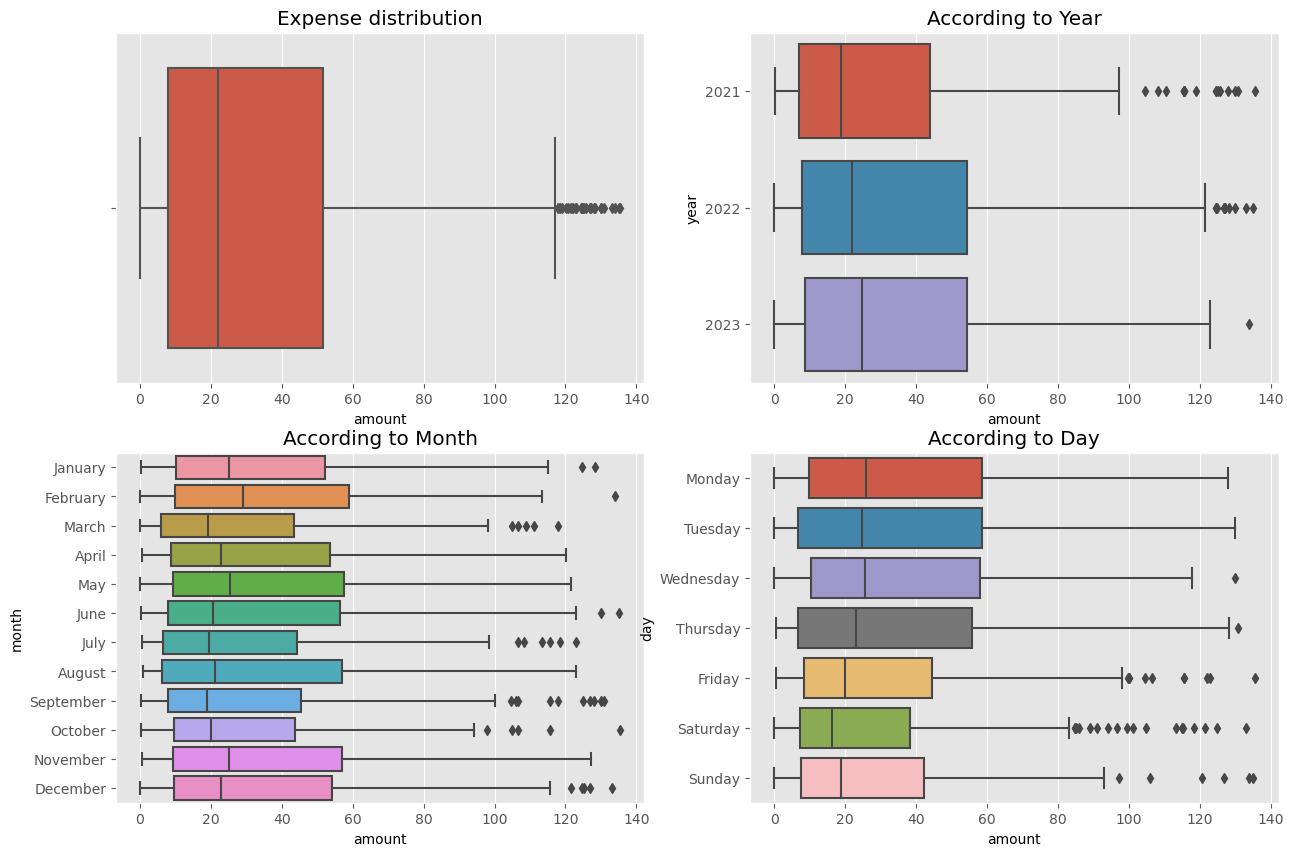

In [34]:
fig = plt.figure(figsize=(15,10)) # create figure

row_colum=[2,2]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) 
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2)
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3)
ax3 = fig.add_subplot(row_colum[0], row_colum[1], 4)

ax0.set_title("Expense distribution")
sns.boxplot(data=df_debit_clean, x="amount", ax=ax0, orient="h")
ax1.set_title("According to Year")
sns.boxplot(data=df_debit_clean, x="amount", y="year", ax=ax1, orient="h")
ax2.set_title("According to Month")
sns.boxplot(data=df_debit_clean, x="amount", y="month", ax=ax2, orient="h")
ax3.set_title("According to Day")
sns.boxplot(data=df_debit_clean, x="amount", y="day", ax=ax3, orient="h")
plt.show()

In [35]:
df_debit_clean.sort_values(by=["amount"],ascending=False).head(5)

,date,day,month,year,name,startbalance,endbalance,debit_credit,amount,description,bankname,label
211,2021-10-08,Friday,October,2021,GAMMA,12212.41,12076.92,Debit,135.49,BEA NR:96BS02 08.10.21/09.56 GAMMA Son en ...,ABN AMRO,Store
921,2022-06-05,Sunday,June,2022,Figure Skating Academy The Netherlands,895.93,760.93,Debit,135.00,Name: Figure Skating Academy The Netherlands D...,ING BANK,Courses
1625,2023-02-05,Sunday,February,2023,PRAXIS,6206.54,6072.57,Debit,133.97,"BEA, Betaalpas Praxis 322 Ei...",ABN AMRO,Store
1480,2022-12-17,Saturday,December,2022,Other,3471.85,3338.85,Debit,133.00,"BEA, Betaalpas CCV*WYNWOOD B...",ABN AMRO,Other Expenses
179,2021-09-30,Thursday,September,2021,PRAXIS,14618.18,14487.46,Debit,130.72,BEA NR:AE4802 30.09.21/12.00 PRAXIS EINDHO...,ABN AMRO,Store


<Axes: title={'center': 'The Top 10 Expenses Which Have No Outliers'}>

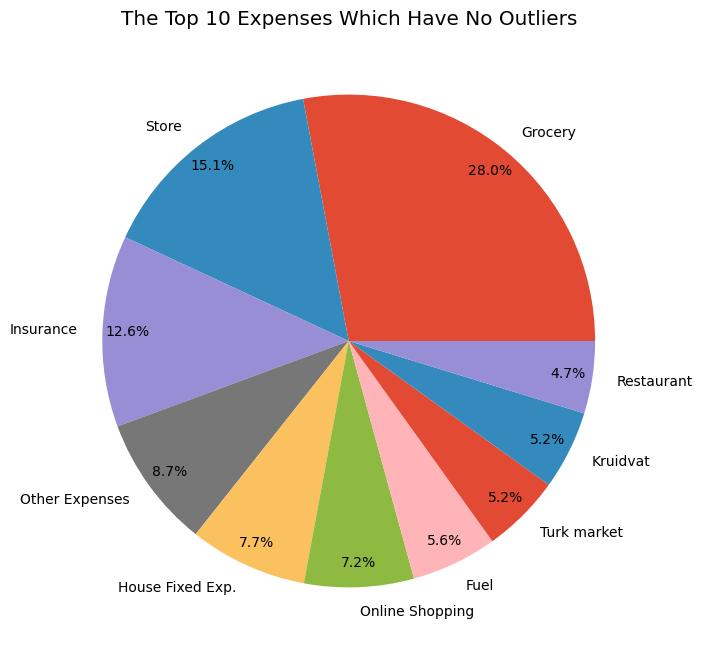

In [54]:
#colors = sns.color_palette('bright')[0:3]
pie_chart_df = df_debit_clean.groupby(["label"])[["amount"]].sum("amount").sort_values(by="amount", ascending=False).head(10)
pie_chart_df.plot(kind = "pie",
                        y="amount",
                        figsize=[8,8],
                        labels = pie_chart_df.index, # turn off labels on pie chart
                        autopct='%0.01f%%',
                        shadow=False,         
                        pctdistance=0.9,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        #explode=[0.1,0,0,0,0,0,0],
                        legend=False,
                        ylabel="",
                        title="The Top 10 Expenses Which Have No Outliers")

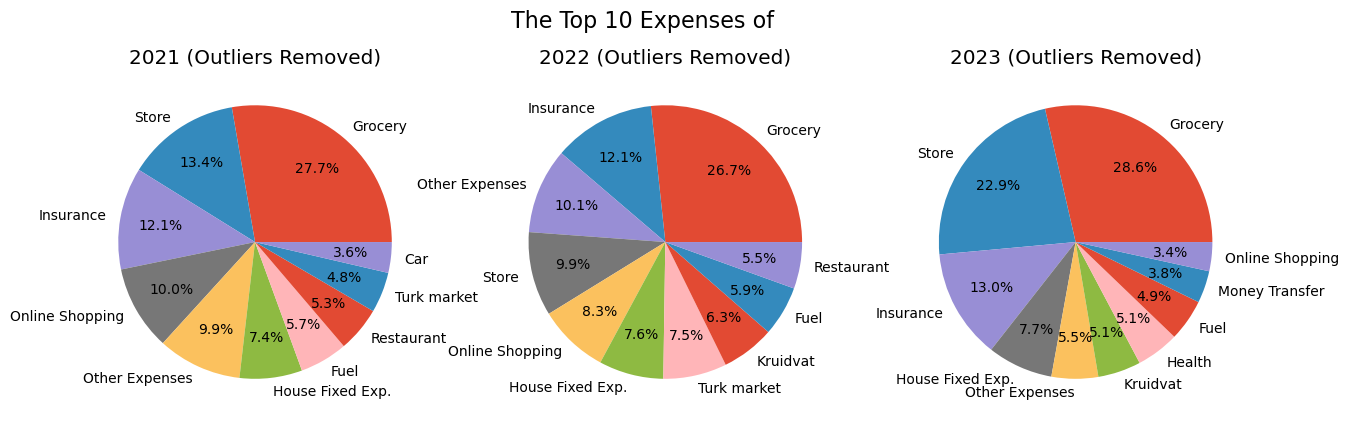

In [93]:
df_list=dict()
nrow=1
ncol=3

# make a list of all dataframes 
for i in df_debit["year"].unique():
    df_list[i]= df_debit_clean.loc[(df_debit_clean["year"]==i)].groupby(["label"]).sum("amount").sort_values(by="amount", ascending=False).head(10)["amount"]
    

fig, axes = plt.subplots(nrow, ncol,figsize=(15,15),sharey=False, sharex=True)
fig.suptitle(t="The Top 10 Expenses of ", y=0.65,fontsize=16)
# plot counter
count=list(df_list.keys())[0]
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind = "pie",
                        y="amount",
                        #figsize=[8,8],
                        labels = df_list[count].index, # turn off labels on pie chart
                        autopct='%0.01f%%',
                        shadow=False,         
                        pctdistance=0.7,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        #explode=[0.1,0,0,0,0,0,0],
                        legend=False,
                        ylabel="",
                        ax=axes[c])
                        #title="The Top 10 Expenses Which Have No Outliers")
        title= str(count) + " (Outliers Removed)"
        axes[c].set_title(title)    
        axes[c].set_ylabel('')
        count+=1


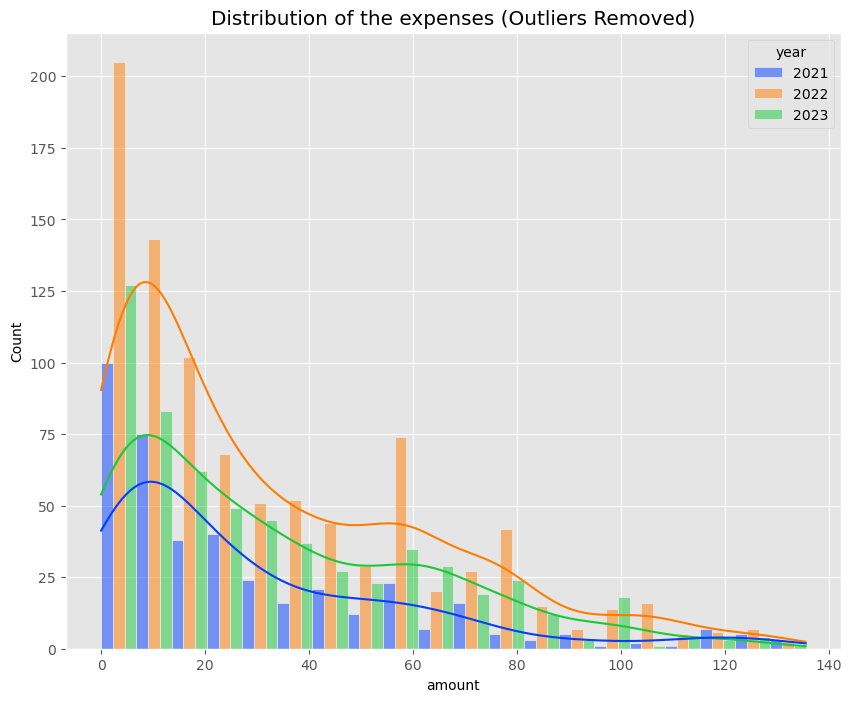

In [50]:
plt.figure(figsize=(10,8))
colors = sns.color_palette('bright')[0:3]
sns.histplot(df_debit_clean, x="amount", hue="year", bins=20, kde=True, palette=colors, multiple="dodge")
plt.title("Distribution of the expenses (Outliers Removed)")
plt.show()

Text(0, 0.5, '')

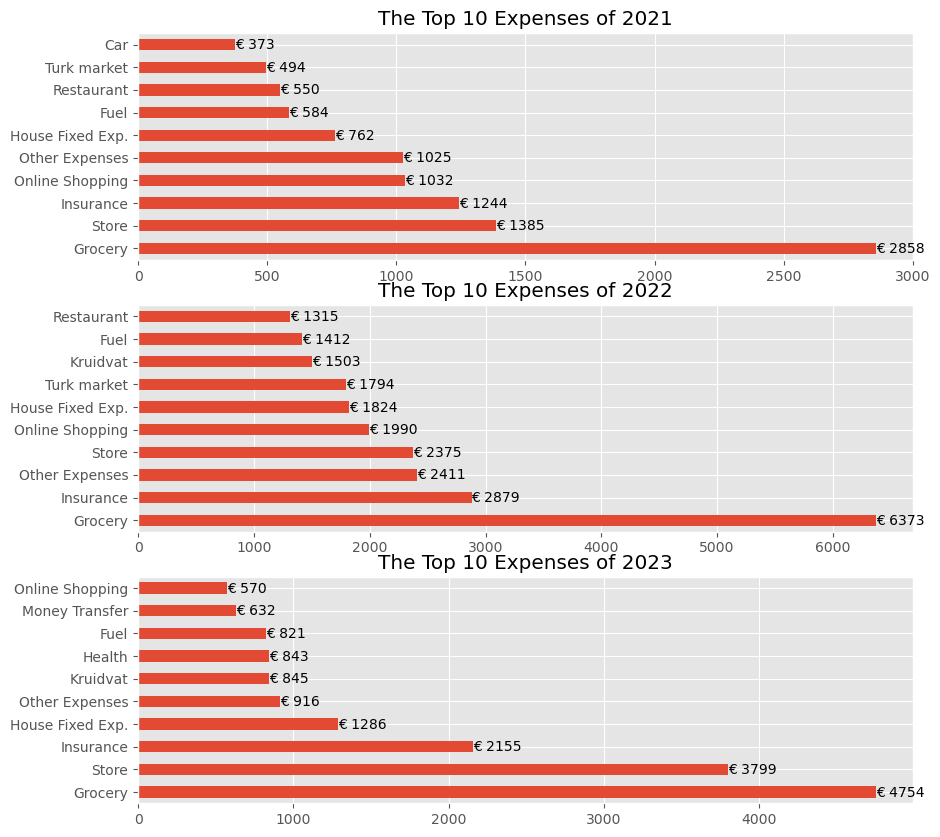

In [39]:
fig = plt.figure() # create figure
row_colum=[3,1]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) 
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2)
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3) 
figsize=(10,10)
################ ax0
df_query= df_debit_clean.loc[(df_debit_clean["year"]==2021)].groupby(["label"]).sum("amount").sort_values(by="amount", ascending=False).head(10)

df_query["amount"].plot(kind="barh",figsize=figsize, ax= ax0)
for index, value in enumerate(df_query["amount"]):
    #label=format(int(value),",")
    ax0.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.2), color="black")
ax0.set_title("The Top 10 Expenses of 2021")    
ax0.set_ylabel('')
###############
df_query= df_debit_clean.loc[(df_debit_clean["year"]==2022)].groupby(["label"]).sum("amount").sort_values(by="amount", ascending=False).head(10)

df_query["amount"].plot(kind="barh",figsize=figsize, ax= ax1)
for index, value in enumerate(df_query["amount"]):
    #label=format(int(value),",")
    ax1.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.2), color="black")
ax1.set_title("The Top 10 Expenses of 2022")    
ax1.set_ylabel('')
######################
df_query= df_debit_clean.loc[(df_debit_clean["year"]==2023)].groupby(["label"]).sum("amount").sort_values(by="amount", ascending=False).head(10)

df_query["amount"].plot(kind="barh",figsize=figsize, ax= ax2)
for index, value in enumerate(df_query["amount"]):
    #label=format(int(value),",")
    ax2.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.2), color="black")
ax2.set_title("The Top 10 Expenses of 2023")    
ax2.set_ylabel('')

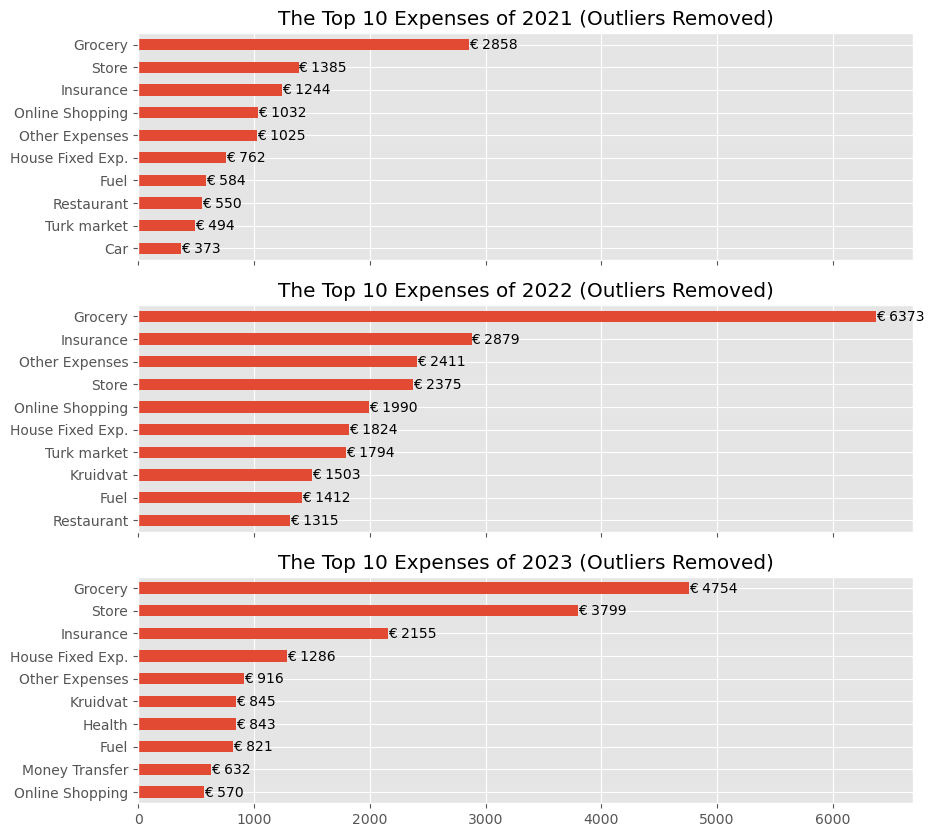

In [52]:
#define number of rows and columns for subplots
df_list=dict()
nrow=3
ncol=1

# make a list of all dataframes 
for i in df_debit["year"].unique():
    df_list[i]= df_debit_clean.loc[(df_debit_clean["year"]==i)].groupby(["label"]).sum("amount").sort_values(by="amount", ascending=True).tail(10)["amount"]
    

fig, axes = plt.subplots(nrow, ncol,figsize=(10,10),sharey=False, sharex=True)

# plot counter
count=list(df_list.keys())[0]
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(kind="barh",ax=axes[r])
        for index, value in enumerate(pd.DataFrame(df_list[count])["amount"]):
            axes[r].annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.2), color="black")
        title= "The Top 10 Expenses of " + str(count) + " (Outliers Removed)"
        axes[r].set_title(title)    
        axes[r].set_ylabel('')
        count+=1

# Expenses Which Are Outliers

In [ ]:
df_debit_outliers[["amount"]].describe().T

In [ ]:
fig = plt.figure(figsize=(15,10)) # create figure

row_colum=[2,2]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) 
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2)
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3)
ax3 = fig.add_subplot(row_colum[0], row_colum[1], 4)

ax0.set_title("Expense distribution")
sns.boxplot(data=df_debit_outliers, x="amount", ax=ax0, orient="h")
ax1.set_title("According to Year")
sns.boxplot(data=df_debit_outliers, x="amount", y="year", ax=ax1, orient="h")
ax2.set_title("According to Month")
sns.boxplot(data=df_debit_outliers, x="amount", y="month", ax=ax2, orient="h")
ax3.set_title("According to Day")
sns.boxplot(data=df_debit_outliers, x="amount", y="day", ax=ax3, orient="h")
plt.show()

In [ ]:
df_debit_outliers.sort_values(by=["amount"],ascending=False)

In [ ]:
plt.figure(figsize=(10,8))
colors = sns.color_palette('bright')[0:3]
sns.histplot(df_debit_outliers, x="amount", hue="year", bins=20, kde=True, palette=colors, multiple="dodge")
plt.title("Distribution of the expenses outliers")
plt.show()

In [ ]:
#colors = sns.color_palette('bright')[0:3]
pie_chart_df = df_debit_outliers.groupby(["label"])[["amount"]].sum("amount").sort_values(by="amount", ascending=False).head(10)
pie_chart_df.plot(kind = "pie",
                        y="amount",
                        figsize=[8,8],
                        labels = pie_chart_df.index, # turn off labels on pie chart
                        autopct='%0.01f%%',
                        shadow=False,         
                        pctdistance=0.9,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        #explode=[0.1,0,0,0,0,0,0],
                        legend=False,
                        ylabel="",
                        title="The Top 10 expenses of outliers")

In [ ]:
sns.boxplot(data=df_debit_outliers, x="year", y="amount")

In [ ]:
sns.boxplot(data=df.loc[df["debit_credit"]=="Debit"]["amount"])

In [ ]:
sns.boxplot(data=df.loc[(df["debit_credit"]=="Debit")&(df["amount"]<111)]["amount"])

In [ ]:
sum_expenses=pd.concat([df.loc[df["debit_credit"]=="Debit"].groupby(["year"]).sum("amount"),numberofmonths_df],axis=1)
sum_expenses["averagedebit"]=sum_expenses["amount"]/sum_expenses["numberofmonths"]
print("%.2f"%sum_expenses["averagedebit"][2022])
numberofmonths_df
sum_expenses["averagedebit"].plot(kind="barh")

The average yearly expenses according to month is yearly increasing

In [ ]:
sum_expenses

In [ ]:
fig = plt.figure() # create figure
row_colum=[4,2]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3)
ax3 = fig.add_subplot(row_colum[0], row_colum[1], 4)
ax4 = fig.add_subplot(row_colum[0], row_colum[1], 5)
ax5 = fig.add_subplot(row_colum[0], row_colum[1], 6)
ax6 = fig.add_subplot(row_colum[0], row_colum[1], 7)
ax7 = fig.add_subplot(row_colum[0], row_colum[1], 8)
figsize=(20,25)
################ ax0
df["label"].value_counts().to_frame().plot(kind="barh",figsize= figsize,ax=ax0)
ax0.set_title("Number of expenses according to the Label")
ax0.set_ylabel('')
############### ax1
df_debit= df.loc[(df["year"]==2022) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum().reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot= df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, xlim=(0,7500), ax= ax1)
for index, value in enumerate(df_barplot[2022]):
    #label=format(int(value),",")
    ax1.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
ax1.set_title("Sum of expenses in 2022 except Mortgage")    
ax1.set_ylabel('')

############### ax2
pie_chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] !="Mortgage")].groupby(["day"])[["amount"]].sum()
pie_chart_df["amount"].plot(kind = "pie",
                        figsize=figsize,
                        labels = None, # turn off labels on pie chart
                        autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0],
                        ax= ax2
                       )
# scale the title up by 12% to match pctdistance
#ax2.title('XXXX', y=1.1) 

# add legend
ax2.legend(labels=pie_chart_df.index, loc='upper left')     
ax2.set_title("Sum of expenses for each day in 2022") 
ax2.set_ylabel('')
#################### ax3
df_debit= df.loc[(df["year"]==2023) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum().reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot= df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, xlim=(0,7500), ax= ax3)
for index, value in enumerate(df_barplot[2023]):
    #label=format(int(value),",")
    ax3.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")    

ax3.set_title("Sum of expenses in 2023 except Mortgage")    
ax3.set_ylabel('')
#################### ax4

chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Grocery")].groupby(["day"])[["amount"]].sum()
chart_df["amount"].plot(kind = "pie",
                        figsize=figsize,
                        labels = chart_df["amount"].round(2), # turn off labels on pie chart
                        #autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0],# 'explode' lowest 3 continents
                        ax=ax4
                       )
# scale the title up by 12% to match pctdistance
ax4.set_title("Sum of Grocery expenses in 2022") 

# add legend
ax4.legend(labels=chart_df.index, loc='upper left') 
ax4.set_ylabel('')
########################### ax5

df_debit= df.loc[(df["year"]>=2022) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum().reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot=df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, ax=ax5)
for index, value in enumerate(df_barplot[2022]):
    #label=format(int(value),",")
    ax5.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
for index, value in enumerate(df_barplot[2023]):
    #label=format(int(value),",")
    ax5.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index), color="black")
    
#################################### ax6
sum_expenses=pd.concat([df.loc[df["debit_credit"]=="Debit"].groupby(["year"]).sum(),numberofmonths_df],axis=1)
sum_expenses["averagedebit"]=sum_expenses["amount"]/sum_expenses["numberofmonths"]
#print("%.2f"%wm["averagedebit"][2022])
sum_expenses["averagedebit"].plot(kind="barh", figsize=figsize, ax=ax6)
for index, value in enumerate(sum_expenses["averagedebit"]):
    #label=format(int(value),",")
    ax6.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index), color="black")
ax6.set_title("Average expenses") 
plt.show()

In [ ]:
fig = plt.figure() # create figure
row_colum=[4,2]
ax0 = fig.add_subplot(row_colum[0], row_colum[1], 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(row_colum[0], row_colum[1], 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(row_colum[0], row_colum[1], 3)
ax3 = fig.add_subplot(row_colum[0], row_colum[1], 4)
ax4 = fig.add_subplot(row_colum[0], row_colum[1], 5)
ax5 = fig.add_subplot(row_colum[0], row_colum[1], 6)
ax6 = fig.add_subplot(row_colum[0], row_colum[1], 7)
ax7 = fig.add_subplot(row_colum[0], row_colum[1], 8)
figsize=(20,25)
################ ax0
df_debit= df.loc[(df["year"]==2021) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum("amount").reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot= df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, xlim=(0,7500), ax= ax0)
for index, value in enumerate(df_barplot[2021]):
    #label=format(int(value),",")
    ax0.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
ax0.set_title("Sum of expenses in 2021 except Mortgage")    
ax0.set_ylabel('')

############### ax1
df_debit= df.loc[(df["year"]==2022) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum("amount").reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot= df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, xlim=(0,7500), ax= ax1)
for index, value in enumerate(df_barplot[2022]):
    #label=format(int(value),",")
    ax1.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
ax1.set_title("Sum of expenses in 2022 except Mortgage")    
ax1.set_ylabel('')

############### ax2
df_debit= df.loc[(df["year"]==2023) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum("amount").reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot= df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, xlim=(0,7500), ax= ax2)
for index, value in enumerate(df_barplot[2023]):
    #label=format(int(value),",")
    ax2.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
ax2.set_title("Sum of expenses in 2023 except Mortgage") 

################ ax3
df_debit= df.loc[(df["year"]==2023) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum("amount").reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot= df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, xlim=(0,7500), ax= ax3)
for index, value in enumerate(df_barplot[2023]):
    #label=format(int(value),",")
    ax3.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")    

ax3.set_title("Sum of expenses in 2023 except Mortgage")    
ax3.set_ylabel('')

################# ax4

chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Grocery")].groupby(["day"])[["amount"]].sum("amount")
chart_df["amount"].plot(kind = "pie",
                        figsize=figsize,
                        labels = chart_df["amount"].round(2), # turn off labels on pie chart
                        #autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0],# 'explode' lowest 3 continents
                        ax=ax4
                       )
# scale the title up by 12% to match pctdistance
ax4.set_title("Sum of Grocery expenses in 2022") 

# add legend
ax4.legend(labels=chart_df.index, loc='upper left') 
ax4.set_ylabel('')

#################### ax5

df_debit= df.loc[(df["year"]>=2022) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum("amount").reset_index("year")
df_barplot= df_debit.pivot(columns="year")["amount"]
df_barplot=df_barplot.fillna(0)

df_barplot.plot(kind="barh",figsize=figsize, ax=ax5)
for index, value in enumerate(df_barplot[2022]):
    #label=format(int(value),",")
    ax5.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
for index, value in enumerate(df_barplot[2023]):
    #label=format(int(value),",")
    ax5.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index), color="black")
    
###################### ax6
sum_expenses=pd.concat([df.loc[df["debit_credit"]=="Debit"].groupby(["year"]).sum("amount"),numberofmonths_df],axis=1)
sum_expenses["averagedebit"]=sum_expenses["amount"]/sum_expenses["numberofmonths"]
#print("%.2f"%wm["averagedebit"][2022])
sum_expenses["averagedebit"].plot(kind="barh", figsize=figsize, ax=ax6)
for index, value in enumerate(sum_expenses["averagedebit"]):
    #label=format(int(value),",")
    ax6.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index), color="black")
ax6.set_title("Average expenses") 

######################## ax7
pie_chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] !="Mortgage")].groupby(["day"])[["amount"]].sum("amount")
pie_chart_df["amount"].plot(kind = "pie",
                        figsize=figsize,
                        labels = None, # turn off labels on pie chart
                        autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0],
                        ax= ax7
                       )
# scale the title up by 12% to match pctdistance
#ax2.title('XXXX', y=1.1) 

# add legend
ax7.legend(labels=pie_chart_df.index, loc='upper left')     
ax7.set_title("Sum of expenses for each day in 2022") 
ax7.set_ylabel('')
plt.show()


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5),sharey=True, sharex=True)
df_filter=df.loc[(df["debit_credit"]=="Debit") & (df["label"]=="Fuel")]
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator=sum, errorbar=None, ax=ax[0])
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="max", errorbar=None, ax=ax[1])
sns.barplot(x=df_filter["amount"],y=df_filter["month"],hue=df_filter["year"],estimator="min", errorbar=None, ax=ax[2])
ax[0].set_title("Summation of Fuel Expenses")
ax[1].set_title("Maximum Value of Fuel Expenses")
ax[2].set_title("Minimum Value of Fuel Expenses")

In [ ]:
df.loc[df["description"].str.contains("SEPA")]

In [ ]:
df_debit= df.loc[(df["year"]>=2021) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label","year"]).sum("amount").reset_index("year")
df_barplot= df_debit.pivot(columns="year",values="amount")
df_barplot=df_barplot.fillna(0)
df_barplot


In [ ]:
#df_debit= df.loc[(df["year"]>=2022) & (df["debit_credit"]=="Debit") & (df["label"] !="Mortgage")].groupby(["label"]).sum()
df_barplot.plot(kind="barh",figsize=(10,10))
for index, value in enumerate(df_barplot[2022]):
    #label=format(int(value),",")
    plt.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index-0.3), color="black")
for index, value in enumerate(df_barplot[2023]):
    #label=format(int(value),",")
    plt.annotate("\N{euro sign} "+ str(int(value)), xy=(value, index), color="black")
plt.show

In [ ]:
pie_chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] !="Mortgage")].groupby(["day"])[["amount"]].sum()
pie_chart_df["amount"].plot(kind = "pie",
                        figsize=(15, 6),
                        labels = None, # turn off labels on pie chart
                        autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0] # 'explode' lowest 3 continents
                       )
# scale the title up by 12% to match pctdistance
plt.title('XXXX', y=1.1) 

# add legend
plt.legend(labels=chart_df.index, loc='upper left') 
plt.title('Grocery', y=1.1) 

plt.rcParams["figure.autolayout"] = True
plt.axis('equal')
plt.show()


In [ ]:
chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Grocery")].groupby(["day"])[["amount"]].count()
chart_df["amount"].plot(kind = "pie",
                        figsize=(15, 6),
                        labels = chart_df["amount"], # turn off labels on pie chart
                        #autopct='%0.02f%%',
                        shadow=True,         
                        pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                        #colors=[],  # add custom colors
                        explode=[0.1,0,0,0,0,0,0] # 'explode' lowest 3 continents
                       )
# scale the title up by 12% to match pctdistance
plt.title('Grocery', y=1.1) 

#plt.rcParams["figure.autolayout"] = True
plt.axis('equal')

# add legend
plt.legend(labels=chart_df.index, loc='best') 

plt.show()
chart_df

In [ ]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Turk market")]

In [ ]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==2022) & (df["label"] =="Turk market")].groupby("date").sum()["amount"].plot(kind="barh")

In [ ]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022)].groupby("day")["amount"]\
.sum().sort_values(ascending=False).sort_values().plot(kind="barh",figsize = (5,10), title="Sum of Expenses according to Days,2022",grid=True)
plt.show()

In [ ]:
#df.loc[(df["Debit/credit"]=="Debit") & (df["Year"]==2022) & (df["Month"]=="January")]
with pd.ExcelWriter('output1.xlsx') as writer:  
    df.loc[(df["Debit/credit"]=="Debit") & (df["Year"]==2022) & (df["Month"]=="January")].to_excel(writer, sheet_name="all")
    #df_income.to_excel(writer, sheet_name='income')
    #df_expense.to_excel(writer, sheet_name='expense')

In [ ]:
df_query=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Fuel")].groupby("month")["amount"].sum()
df_query.plot(kind="barh",figsize = (8,8), title="Fuel Expenses according to Months, 2022")
plt.show()
df_query

In [ ]:
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])
    
grocery_mean=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Grocery")].groupby(["year","month"])["amount"].sum()

grocery_mean.plot(kind="barh",figsize = (5,10), title="Grocery Expenses according to Months, 2022")
plt.show()
grocery_mean

In [ ]:
df.groupby(["year"])["month"].unique()

In [ ]:
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])
for i in numberofMonths:
    print(numberofMonths[i])
for i in numberofMonths.keys():
    print(i*2)

In [ ]:
pd.Timedelta(df.loc[df["Year"] == 2022]["Date"].max() - df.loc[df["Year"] == 2022]["Date"].min())

In [ ]:
#super market ve turkmarket aylık ortalama
turk=[]
grocery=[]
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])

for i in numberofMonths.keys():
    print("For year ",i)
    df_groc=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Grocery")].groupby("year")["amount"].sum()/numberofMonths[i]
    df_turk= (df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()/numberofMonths[i])
    turk.append(df_turk.iloc[0])
    grocery.append(df_groc.iloc[0])
    print("Turk Market: \N{euro sign}{:.2f} ".format(df_turk.iloc[0]))
    print("Grocery: \N{euro sign}{:.2f}".format(df_groc.iloc[0]))
market_mean = {"Year":list(numberofMonths.keys()),
               "Turk Market":turk,
              "Grocery":grocery}
market_mean_df=pd.DataFrame(market_mean,index=market_mean["Year"])
market_mean_df.drop(columns=["Year"],axis= 0).plot(kind="barh")
market_mean_df
#for i in numberofMonths.keys():
#    print("For year ",i)
#    df_turk= (df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()/numberofMonths[i]).sort_values(ascending=False)
#    print("Turk Market:\n {}".format(df_turk))


In [ ]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Grocery")|(df["label"]=="Turk market")].groupby("label").sum()

In [ ]:
df_turk= (df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()/numberofMonths[2022]).sort_values(ascending=False)
df_turk

In [ ]:
df_market=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Turk market")].groupby("year")["amount"].sum()
df_market

In [ ]:
df.head()

In [ ]:
#super market ve turkmarket aylık ortalama
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])

for i in numberofMonths.keys():
    print("For year ",i)
    df_market=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==i) & (df["label"]=="Grocery|Turk Market")].groupby("year")["amount"].sum()/numberofMonths[i]
    print(df_market)
    print("Grocery:\n {}".format(df_market))

In [ ]:
months
numberofMonths

In [ ]:
pd.DataFrame(df.loc[(df["debit_credit"]=="Debit") & (df["year"]==2022) & (df["label"]=="Grocery")].groupby("year")["amount"].sum()/10)

In [ ]:
df.groupby("debit_credit")["amount"].sum()

In [ ]:
df.loc[df["Debit/credit"]=="Debit" ].groupby(["Month"])[["Amount"]].sum()

In [ ]:
df.loc[df["Debit/credit"]=="Debit" ].groupby(["Month","Year"])[["Amount"]].sum()

In [ ]:
df.loc[df["Debit/credit"]=="Debit" ].groupby(["Day"])[["Amount"]].mean()

In [ ]:
df.loc[(df["Debit/credit"]=="Debit") & (df["Year"]==2023)].groupby(["Day","Year"])[["Amount"]].aggregate(["mean", max,np.sum]).T

In [ ]:
df["Month"].dtypes

In [ ]:
days_categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day"] = pd.Categorical(df["Day"], categories = days_categories)

In [ ]:
df["Day"].dtypes

In [ ]:
df.loc[df["Label"]=="Income" ].groupby(["Month","Year"])[["Amount"]].sum()

In [ ]:
df.loc[(df["debit_credit"]=="Debit") & (df["year"]<2023)].pivot_table("amount", index = ["year","month"], columns = "day")

In [ ]:
df.loc[df["Debit/credit"]=="Credit"]

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:  
    df.to_excel(writer, sheet_name="all")
    #df_income.to_excel(writer, sheet_name='income')
    #df_expense.to_excel(writer, sheet_name='expense')

In [ ]:
m=df.loc[df["debit_credit"]=="Debit"].groupby(["year"]).sum()
m

In [ ]:
w=pd.DataFrame({"year":numberofMonths.keys(),"numberofmonths":numberofMonths.values()}).set_index("year")
w

In [ ]:
dict(df.groupby("year")["month"].unique())

In [ ]:
months = dict(df.groupby("year")["month"].unique())
numberofMonths = dict()
for i in months:
    numberofMonths[i] = len(months[i])
m=df.loc[df["debit_credit"]=="Debit"].groupby(["year"]).sum()

w=pd.DataFrame({"year":numberofMonths.keys(),"numberofmonths":numberofMonths.values()}).set_index("year")

wm=pd.concat([m,w],axis=1)
wm["averagedebit"]=wm["amount"]/wm["numberofmonths"]
print("%.2f"%wm["averagedebit"][2022])

In [ ]:
## df.loc[(df["debit_credit"]=="Debit")&(df["year"]>=2022)].groupby(["year","month"]).sum().reset_index("year").pivot(columns="year")["amount"].plot(kind="barh")

In [ ]:
a= df.loc[(df["debit_credit"]=="Debit")&(df["year"]==year_)].groupby(["month","year"]).sum().reset_index("year").pivot(columns="year")
a


In [ ]:
a["amount"].sum()/numberofMonths[year_]

In [ ]:
df

In [ ]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression', 'KNN', 'SVM', 'Decision Tree']}).set_index("Algorithm")

# Dashboard

In [ ]:
from dash import dash, html, dcc, Input, Output, dash_table
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import plotly.express as px

#Read the data
df=pd.read_csv(r"D:\00_BACKUP_BY_DRIVE\Bank_expense_analysis\expenses.csv")

# Create a dash application
app= dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add a html.Div and core input text component
# Finally, add graph component.

app.layout = html.Div([
    html.H1('Descriptive Analysis of Expenses in the Netherlands',style={'textAlign':'center'}),
    html.Div([
        html.Div([
            dcc.Dropdown(id='year-drop-down',options=df["year"].unique(), value=2022,
                         multi=False,placeholder='Select a Year', style={'width':'100%','padding':'3px', 'text-align-last' : 'center'}),
            dcc.Dropdown(id='label-drop-down',options=df["label"].unique(), value=["Grocery", "Turk market"],
                         multi=True,placeholder='Select a Label',style={'width':'100%','padding':'3px', 'text-align-last' : 'center'}),
            dcc.Dropdown(id='month-drop-down',options=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
                         multi=False,placeholder='Select a Month',style={'width':'100%','padding':'3px', 'text-align-last' : 'center'}),
            dcc.Dropdown(id='day-drop-down',options=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                         multi=False,placeholder='Select a Day',style={'width':'100%','padding':'3px', 'text-align-last' : 'center'}),

        ], style={'display': 'flex','width':'100%'}),

        #dash_table.DataTable(data=df.to_dict('records'), page_size=10,column_selectable=True),
        
        html.Div([
            
            html.Div([],id='plot-1'),  
            html.Div([],id='plot-2')
                      
        ], style={'display': 'flex','textAlign':'center'}),
     

    ]),  

])

@app.callback([Output(component_id="plot-1",component_property="children"),
               Output(component_id="plot-2",component_property="children")],
              [Input(component_id="year-drop-down",component_property="value"),
               Input(component_id="label-drop-down",component_property="value")])

def get_graph(year,label):
    label_txt = ""
    for i in range(0,len(label)):
        if i < (len(label)-1):
            label_txt = label_txt + label[i] + "|"
            print(label_txt)
        else:
            label_txt += label[i]
        print(label[i])
        print(label_txt)
    
    print(label)
    df_query=df.loc[(df["debit_credit"]=="Debit") & (df["year"]==year) & (df["label"].str.contains(label_txt,case=False))].groupby(["month"])[["month","amount"]].sum("amount")
    bar_data=df_query.reset_index().sort_values(by="amount",ascending=False)
    print(bar_data)
    
    bar_fig= px.bar(bar_data,x="month",y="amount", title=label_txt + " Expenses in "+ str(year))

    chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] == year) & (df["label"].str.contains(label_txt,case=False))].groupby(["day"])[["amount"]].sum()
    pie_fig = px.pie(chart_df.reset_index(),values= "amount", names="day", title= label_txt + " Expenses according to days in "+ str(year))
    
    

    return [dcc.Graph(figure=bar_fig),dcc.Graph(figure=pie_fig)]

if __name__ == '__main__':
    app.run_server()

In [ ]:
from dash import dash, html, dcc, Input, Output
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import plotly.express as px

#Read the data
df=pd.read_csv(r"D:\00_BACKUP_BY_DRIVE\Bank_expense_analysis\expenses.csv")

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div([
    html.H1('Descriptive Analyses of Expenses', style={'textAlign': 'center', 'color': '#503D36','childrennt-size': 40}),
    html.Div([

        html.Div([
            dcc.DatePickerRange(
                id='my-date-picker-range',
                min_date_allowed=df["date"].min(),
                max_date_allowed=df["date"].max(),
                start_date=df["date"].min(),
                end_date=df["date"].max()),
            html.Div([
                html.Div([
                    html.H2('Select Year:', style={'margin-right': '2em'})
                    ]),
                dcc.Dropdown(
                    id='year-drop-down',
                    options=df['year'].unique(),
                    #value="2022",
                    multi=False,
                    placeholder='Select a year',
                    style={'width':'80%', 'padding':'3px', 'font-size': '20px', 'text-align-last' : 'center'}
                    )], style={'display':'flex'})
            ]),
            
            dcc.Dropdown(
                id='month-drop-down',
                options=df['month'].unique(),
                value=df["month"].unique(),
                multi=False,
                placeholder='Select month(s)'
            ),
            dcc.Dropdown(
                id='day-drop-down',
                options=df['day'].unique(),
                value=df["day"].unique(),
                multi=False,
                placeholder='Select day(s)'
            ),
        ],style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='label-drop-down',
                options=np.sort(df['label'].unique()),
                value="Grocery",
                
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            ),
            html.Br(),
            dcc.Slider(
                df['year'].min(),
                df['year'].max(),
                step=None,
                id='slider',
                value=df['year'].max(),
                marks={str(year): str(year) for year in df['year'].unique()}
            )], style={'width': '49%', 'float': 'right', 'display': 'inline-block'}),
            html.Div([], id="graph")
            ], style={'padding': '10px 5px'})




@app.callback(Output(component_id="graph", component_property="children"),
             Input(component_id="year-drop-down", component_property="value"),
             Input(component_id="label-drop-down", component_property="value"))
def get_pie_chart(year, label):
    chart_df = df.loc[(df["debit_credit"]=="Debit") & (df["year"] ==year) & (df["label"] == label)].groupby(["day"])[["amount"]].sum()
    fig= px.pie(data_frame=chart_df, values="amount")
    return dcc.Graph(figure=fig)


if __name__ == '__main__':
    app.run_server()